<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/TRSeminar/blob/main/TRS13_NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Seminar
## Dr. Carlos Villaseñor
## Neural nets from scratch

 # Basic modules and functions

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A help function to draw

In [75]:
# Function for drawing the neuron geometry
def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b
  plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')

In [96]:
def OLN_plot_data(X, Y, net):
  dot_c = ('red', 'green', 'blue', 'black')
  lin_c = ('r-', 'g-', 'b-', 'k-')
  for i in range(X.shape[1]):
      c = np.argmax(Y[:,i])
      plt.scatter(X[0,i], X[1,i], color=dot_c[c], edgecolors='k')

  for i in range(4):
      w1, w2, b = net.w[i,0], net.w[i,1], net.b[i]
      plt.plot([-0.25, 1.25],[(-1/w2)*(w1*(-0.25)+b),(-1/w2)*(w1*(1.25)+b)], lin_c[i])


  #plt.axis('equal')
  plt.xlim([-0.25, 1.25])
  plt.ylim([-0.25, 1.25])

In [76]:
def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100),
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8,
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

# McCulluch and Pitts Neuron

Let's create a neuron from scratch

In [48]:
class Neuron:
  def __init__(self, n_inputs):
    # Inicialize the neuron parameters
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()

  def predict(self, X):
    # Get number of inputs
    _, p = X.shape

    # Create outut matrix
    y_est = np.zeros(p)

    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i]) + self.b
      if y_est[i] >= 0:
        y_est[i] = 1
      else:
        y_est[i] = 0
    return y_est

The next block draw the class of each point in the plane

In [ ]:
# Función para dibujar superficie de desición
def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b
  plt.plot([-5, 5],[(1/w2)*(-w1*(-5)-b),(1/w2)*(-w1*5-b)],'--k')

# Instanciamos la neurona
net = Neuron(2)

# Preparar datos
xmin, ymin = -5, -5
xmax, ymax = 5, 5
xx, yy = np.meshgrid(np.linspace(xmin,xmax, 100),
                     np.linspace(ymin,ymax, 100))
X = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1).T

# Predecir cada punto
y_est = net.predict(X)
zz = y_est.reshape(xx.shape)

# Dibujar
plt.figure()
plt.title('Espacio geométrico de la Neurona de McCulluch-Pitts')
draw_2d_percep(net)
plt.contourf(xx, yy, zz, cmap=plt.cm.RdBu)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.grid()
plt.show()

# Perceptron algorithm

Let's code a Perceptron from scratch

In [54]:
class Perceptron:

  def __init__(self, n_inputs):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()

  def predict(self, X):
    _, p = X.shape
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i])+self.b
      if y_est[i] >= 0:
        y_est[i]=1
      else:
        y_est[i]=0
    return y_est

  def fit(self, X, Y, learning_rate=0.1, epochs=50):
    _, p = X.shape
    for _ in range(epochs):
      for i in range(p):
        y_est = self.predict(X[:,i].reshape(-1,1))
        self.w += learning_rate * (Y[i]-y_est) * X[:,i]
        self.b += learning_rate * (Y[i]-y_est)

This block with train a neuron to approach the "OR" logical gate

In [ ]:
# Create model
model = Perceptron(2)

# Datos
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array( [0, 1, 1, 1])

# fit the model
model.fit(X,Y)

# Make prediction
model.predict(X)

# Draw input data and neuron
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Perceptron')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'x1')
plt.ylabel(r'x2')

draw_2d_percep(model)

# The Linear Neuron

In [60]:
class Linear_Neuron:

  def __init__(self, n_inputs, learning_rate=0.1):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    Y_est = np.dot(self.w, X) + self.b
    return Y_est

  def train(self, X, Y, epochs=50, solver='BGD'):
    _, p = X.shape
    for _ in range(epochs):
      if solver == 'SGD':
        for i in range(p):
            y_est = self.predict(X[:,i])
            self.w += self.eta * (Y[:,i]-y_est) * X[:,i]
            self.b += self.eta * (Y[:,i]-y_est)
      elif solver == 'BDG':
        Y_est = self.predict(X)
        # Completa las siguientes líneas de código
        self.w += (self.eta/p) * ((Y - Y_est) @ X.T).ravel()
        self.b += (self.eta/p) * np.sum(Y - Y_est)

In [ ]:
# Create data
p =100
x = -1 + 2 * np.random.rand(p).reshape(1,-1)
y = -18 * x + 6 + 3 * np.random.randn(p)
plt.plot(x,y,'.b')


neuron = Linear_Neuron(1, 0.1)
neuron.train(x,y,solver='BDG', epochs=100 )

# Draw neuron
xn = np.array([[-1, 1]])
plt.plot(xn.ravel() ,neuron.predict(xn),'--r')
plt.show()

# The Sigmoid Neuron

In [68]:
class Sigmoid_Neuron:

    def __init__(self, n_inputs):
        self.w = - 1 + 2 * np.random.rand(n_inputs)
        self.b = - 1 + 2 * np.random.rand()

    def predict(self, X):
        Z = np.dot(self.w, X) + self.b
        Y_est = 1/(1+np.exp(-Z))
        return Y_est

    def fit(self, X, Y, learning_rate=1, epochs=100):
        p = X.shape[1]
        for _ in range(epochs):
            Y_est = self.predict(X)
            self.w += (learning_rate/p) * ((Y - Y_est) @ X.T).ravel()
            self.b += (learning_rate/p) * np.sum(Y - Y_est)

In [ ]:
# Example
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([0, 0, 0, 1])

neuron = Sigmoid_Neuron(2)
neuron.fit(X,Y)
print(neuron.predict(X))


# Draw
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Sigmoid neuron')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'')
plt.ylabel(r'')
draw_2d_percep(neuron)
plt.show()

# One-Layer Network

Let's code some activation functions

In [103]:
# Activation functions for output layer ------------------------------

# Linear neurons are used for regression problems
def linear(z, derivative=False):
  a = z
  if derivative:
    da = np.ones(z.shape, dtype=float)
    return a, da
  return a

# Sigmoid neurons are used in multi-label or binary classification problems
def sigmoid(z, derivative=False):
  a = 1/(1 + np.exp(-z))
  if derivative:
    da = np.ones(z.shape, dtype=float)
    return a, da
  return a

# Softmax function is used in one-winner multiclass classification problems
def softmax(z, derivative=False):
  e = np.exp(z - np.max(z, axis=0))
  a = e / np.sum(e, axis=0)
  if derivative:
    da = np.ones(z.shape, dtype=float)
    return a, da
  return a

this is the program for a one layer network

In [100]:
class OLN:
  """One-Layer Network"""

  def __init__(self, n_inputs, n_outputs,
               activation_funtion=linear):
      # Initialize parameters
      self.w = - 1 + 2 * np.random.rand(n_outputs, n_inputs)
      self.b = - 1 + 2 * np.random.rand(n_outputs, 1)
      self.f = activation_funtion

  def predict(self, X):
      # Propagate the layer
      Z = self.w @ X + self.b
      return self.f(Z)

  def fit(self, X, Y, epochs=1000,  lr=0.1):
      # Get the columns of X
      p = X.shape[1]

      for _ in range(epochs):
          # Propagation -----------------------------------------------------
          Z = self.w @ X + self.b
          Yest, dY = self.f(Z, derivative=True)

          # Training --------------------------------------------------------

          # Calculate local gradient
          lg = (Y - Yest) * dY

          # Update parameters
          self.w += (lr/p) * lg @ X.T
          self.b += (lr/p) * np.sum(lg, axis=1).reshape(-1,1)

Let's get some data to see how the OLN behave

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/Dataset_A05.csv'
df = pd.read_csv('Dataset_A05.csv')
X = np.asanyarray(df.iloc[:,0:2]).T
Y = np.asanyarray(df.iloc[:,2:]).T

In [ ]:
net = OLN(2, 4, sigmoid)
net.fit(X, Y, epochs=1000, lr=1)
OLN_plot_data(X, Y, net)

# Dense Network (Multi-layer Perceptron)

Create the activations functions for the hidden layers

In [105]:
# Activation functions for hidden layers -----------------------------

def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

def sigmoid_hidden(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a

Let's write the code for the MLP from scratch

In [107]:
class Dense_Network:

    def __init__(self, layers_dims,
                 hidden_activation=tanh,
                 output_activation=sigmoid):

        # Attributes
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)

        # Initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l],
                                                layers_dims[l-1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)

            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation


    def predict(self, X):
        a = X
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a

    def fit(self, X, Y, epochs=500, lr=0.1):
        p = X.shape[1]
        for _ in range(epochs):

            # initialize activations containers
            a = [None] * (self.L + 1)
            da = [None] * (self.L + 1)
            lg = [None] * (self.L + 1)

            # Propagation
            a[0] = X
            for l in range(1, self.L + 1):
                z = np.dot(self.w[l], a[l-1]) + self.b[l]
                a[l], da[l] = self.f[l](z, derivative=True)

            # Backpropagation
            for l in range(self.L, 0, -1):
                if l == self.L:
                    lg[l] = -(Y - a[l]) * da[l]
                else:
                    lg[l] = np.dot(self.w[l+1].T, lg[l + 1]) * da[l]

            # Gradient Descent
            for l in range(1, self.L + 1):
                self.w[l] -= (lr/p) * np.dot(lg[l], a[l - 1].T)
                self.b[l] -= (lr/p) * np.sum(lg[l])


## XOR problem

[[0.97669502 0.02599046 0.02404118 0.97275806]]


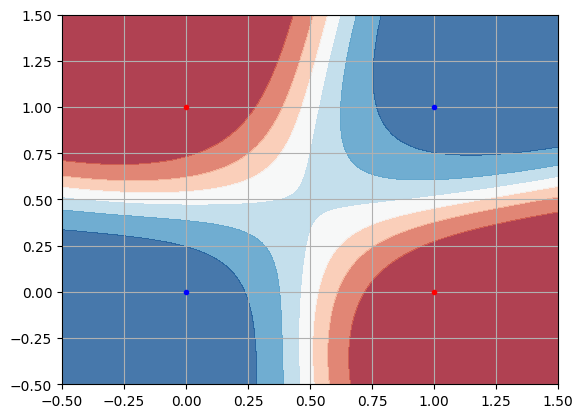

In [113]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[1, 0, 0, 1]])


net = Dense_Network((2,100,1))
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

## Blobs

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/blobs.csv'
df = pd.read_csv('blobs.csv')
X = np.asanyarray(df[['x1', 'x2']]).T
Y = np.asanyarray(df[['y']]).T

In [ ]:
net = Dense_Network((2,100,1))
net.fit(X, Y)
MLP_binary_classification_2d(X,Y,net)

## Moons

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/moons.csv'
df = pd.read_csv('moons.csv')
X = np.asanyarray(df[['x1', 'x2']]).T
Y = np.asanyarray(df[['y']]).T

In [ ]:
net = Dense_Network((2,100,1))
net.fit(X, Y)
MLP_binary_classification_2d(X,Y,net)

## Circles

In [ ]:
!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/TRSeminar/main/Datasets/circles.csv'
df = pd.read_csv('circles.csv')
X = np.asanyarray(df[['x1', 'x2']]).T
Y = np.asanyarray(df[['y']]).T

In [ ]:
net = Dense_Network((2,100,1))
net.fit(X, Y)
MLP_binary_classification_2d(X,Y,net)